# Usage Cost and Benefits Module

The Cost and Benefits Module can be installed with pip:

```
pip install git+https://github.com/milocortes/costs_benefits_ssp.git@main
```

In [1]:
from costs_benefits_ssp.cb_calculate import CostBenefits
import pandas as pd 
import os 

In [2]:
# Load data
SSP_RESULTS_PATH = "/home/milo/Documents/egtp/ejecuciones_cb_paquete/croatia_tornado/ssp_salidas"

ssp_data = pd.read_csv(os.path.join(SSP_RESULTS_PATH, "sisepuede_results_sisepuede_run_2025-01-29T14;04;53.540912_WIDE_INPUTS_OUTPUTS.csv"))
att_primary = pd.read_csv(os.path.join(SSP_RESULTS_PATH, "ATTRIBUTE_PRIMARY.csv"))
att_strategy = pd.read_csv(os.path.join(SSP_RESULTS_PATH, "ATTRIBUTE_STRATEGY.csv"))


In [3]:
# Define baseline strategy
strategy_code_base = "LNDU:PLUR"

# Intanciate an object from the CostBenefits class
cb = CostBenefits(ssp_data = ssp_data, att_primary = att_primary, att_strategy = att_strategy, strategy_code_base = strategy_code_base)


In [4]:
# The export_db_to_excel method saves the initial configuration of the cost tables to an excel file.
# Each sheet represents a table in the cost and benefit program database.

CB_DEFAULT_DEFINITION_PATH = "/home/milo/Documents/egtp/ejecuciones_cb_paquete/croatia_tornado/cb_factores_costo"
CB_DEFAULT_DEFINITION_FILE_PATH = os.path.join(CB_DEFAULT_DEFINITION_PATH, "cb_config_params_croatia_tornado.xlsx")

cb.export_db_to_excel(CB_DEFAULT_DEFINITION_FILE_PATH)


In [5]:
# Once the excel file is saved, we can load it and update the program's database
# The program does not need to load this excel file for its execution. We use the load_cb_parameters method to show a functionality of the program
CB_DEFAULT_DEFINITION_FILE_PATH = "/home/milo/Documents/egtp/ejecuciones_cb_paquete/croatia/cb_factores_costo/cb_config_params_croatia.xlsx"
cb.load_cb_parameters(CB_DEFAULT_DEFINITION_FILE_PATH)


Cargamos configuración de archivo excel
Se actualizó la base de datos


## Module functionalities

In [6]:
# The get_cb_var_fields method allows us to obtain information about some cost variable
air_pollution_diesel = cb.get_cb_var_fields(cb_var_name = "cb:trns:air_pollution:X:diesel")
air_pollution_diesel


CostFactor(
		output_variable_name = cb:trns:air_pollution:X:diesel,
		difference_variable = energy_consumption_trns_public_diesel|energy_consumption_trns_road_heavy_freight_diesel|energy_consumption_trns_road_heavy_regional_diesel|energy_consumption_trns_road_light_diesel,
		multiplier = -8471713.0,
		multiplier_unit = $/PJ,
		annual_change = 1.0,
		output_display_name = Transport air pollution (diesel),
		sum = False,
		natural_multiplier_units = $0.31/l diesel      ,
		display_notes = We use the IMFÃs fossil fuel subsidies database (2021) to estimate the avoided air pollution costs of fossil fuels used for road transport, averaged across LAC.,
		internal_notes = none,
		cb_function = cb_apply_cost_factors,
		cb_var_group = trns_air_pollution_cost_factors) 

In [7]:
lvst_produced_chickens = cb.get_cb_var_fields(cb_var_name = "cb:lvst:lvst_value:livestock_produced:chickens")
lvst_produced_chickens

CostFactor(
		output_variable_name = cb:lvst:lvst_value:livestock_produced:chickens,
		difference_variable = pop_lvst_chickens,
		multiplier = 2.6,
		multiplier_unit = $/head,
		annual_change = 1.0,
		output_display_name = Value of livestock (chickens) ,
		sum = False,
		natural_multiplier_units = $2.6/head,
		display_notes = The value per ton of crops and livestock varies by type and is based on producer prices from FAOStatÃ¯Â¿Â½s food producer prices dataset (FAO, undated), with TLU values (FAO 2023) and average production efficiencies for livestock (Williams and Anderson, 2020).,
		internal_notes = revised 6/21/23,
		cb_function = cb_apply_cost_factors,
		cb_var_group = afolu_crop_livestock_production_cost_factors) 

In [8]:
## The method get_all_cost_factor_variables retrieve all the cost variables by querying the TXTable table
tx_table = cb.get_all_cost_factor_variables()
tx_table


,output_variable_name,output_display_name,internal_notes,display_notes,cost_type
0,cb:wali:technical_cost:sanitation:unimp_rural,Sanitation cost (unimproved rural),ND,Domestic sanitation and wastewater treatment c...,system_cost
1,cb:wali:technical_cost:sanitation:imp_rural,Sanitation cost (improved rural),ND,Domestic sanitation and wastewater treatment c...,system_cost
2,cb:wali:technical_cost:sanitation:safeman_rural,Sanitation cost (safely managed rural),ND,Domestic sanitation and wastewater treatment c...,system_cost
3,cb:wali:technical_cost:sanitation:unimp_urban,Sanitation cost (unimproved urban),ND,Domestic sanitation and wastewater treatment c...,system_cost
4,cb:wali:technical_cost:sanitation:imp_urban,Sanitation cost (improved urban),ND,Domestic sanitation and wastewater treatment c...,system_cost
...,...,...,...,...,...
203,cb:lndu:technical_cost:all_secondary_forests:X,Cost of silvopasture,ND,We conservatively estimate the cost of silvopa...,transformation_cost
204,cb:ippu:technical_cost:industrial_ccs:X,Cost of industrial ccs,ND,The IEA (2020b) estimates that CCS globally ad...,transformation_cost
205,cb:agrc:consumer_savings:cons_ag_land_value:X,Increase in land value (conservation agriculture),ND,"Telles et al., (2018) estimate the difference ...",transformation_cost
206,cb:agrc:technical_savings:cons_ag:X,Savings in agriculture,ND,"Telles et al., (2018) estimate the difference ...",transformation_cost


In [9]:
## The method get_all_cost_factor_variables retrieve all the cost variables by querying the CostFactor table
cost_factor_table = cb.get_cost_factors()
cost_factor_table

,output_variable_name,difference_variable,multiplier,multiplier_unit,annual_change,output_display_name,sum,natural_multiplier_units,display_notes,internal_notes,cb_function,cb_var_group
0,cb:wali:technical_cost:sanitation:unimp_rural,pop_unimproved_rural,-6.5,$/capita,1.0,Sanitation cost (unimproved rural),False,$6.5 per capita per year,Domestic sanitation and wastewater treatment c...,ND,cb_strategy_specific_function,wali_sanitation_cost_factors
1,cb:wali:technical_cost:sanitation:imp_rural,pop_improved_rural,-68.1,$/capita,1.0,Sanitation cost (improved rural),False,$68.1 per capita per year,Domestic sanitation and wastewater treatment c...,ND,cb_strategy_specific_function,wali_sanitation_cost_factors
2,cb:wali:technical_cost:sanitation:safeman_rural,pop_safelymanaged_rural,-102.1,$/capita,1.0,Sanitation cost (safely managed rural),False,$102.1 per capita per year,Domestic sanitation and wastewater treatment c...,ND,cb_strategy_specific_function,wali_sanitation_cost_factors
3,cb:wali:technical_cost:sanitation:unimp_urban,pop_unimproved_urban,-6.5,$/capita,1.0,Sanitation cost (unimproved urban),False,$6.5 per capita per year,Domestic sanitation and wastewater treatment c...,ND,cb_strategy_specific_function,wali_sanitation_cost_factors
4,cb:wali:technical_cost:sanitation:imp_urban,pop_improved_urban,-34.1,$/capita,1.0,Sanitation cost (improved urban),False,$34.1 per capita per year,Domestic sanitation and wastewater treatment c...,ND,cb_strategy_specific_function,wali_sanitation_cost_factors
...,...,...,...,...,...,...,...,...,...,...,...,...
154,cb:enfu:fuel_cost:trns:gasoline,totalvalue_enfu_fuel_consumed_trns_fuel_gasoline,-500000.0,ND,1.0,Fuel Cost bio fuel_biogas,False,Bias corrected to be half of what they current...,Costs of electricity and fuels are endogenousl...,gasoline,cb_strategy_specific_function,enfu_fuel_cost_factors_detail
155,cb:enfu:fuel_cost:trns:hydrocarbon_gas_liquids,totalvalue_enfu_fuel_consumed_trns_fuel_hydroc...,-500000.0,ND,1.0,Fuel Cost bio fuel_biogas,False,Bias corrected to be half of what they current...,Costs of electricity and fuels are endogenousl...,hydrocarbon_gas_liquids,cb_strategy_specific_function,enfu_fuel_cost_factors_detail
156,cb:enfu:fuel_cost:trns:hydrogen,totalvalue_enfu_fuel_consumed_trns_fuel_hydrogen,-500000.0,ND,1.0,Fuel Cost bio fuel_biogas,False,Bias corrected to be half of what they current...,Costs of electricity and fuels are endogenousl...,hydrogen,cb_strategy_specific_function,enfu_fuel_cost_factors_detail
157,cb:enfu:fuel_cost:trns:kerosene,totalvalue_enfu_fuel_consumed_trns_fuel_kerosene,-500000.0,ND,1.0,Fuel Cost bio fuel_biogas,False,Bias corrected to be half of what they current...,Costs of electricity and fuels are endogenousl...,kerosene,cb_strategy_specific_function,enfu_fuel_cost_factors_detail


In [10]:
## The method get_technical_costs retrieve all the transformation cost by querying the TransformationCost table 
transformation_cost_table = cb.get_technical_costs()
transformation_cost_table


,output_variable_name,transformation_code,include,include_variant,test_id_variant_suffix,comparison_id_variant,cb_function,difference_variable,multiplier,multiplier_unit,annual_change,arg1,arg2,sum,natural_multiplier_units
0,cb:inen:technical_cost:fuel_switch:lo_heat,TX:INEN:SHIFT_FUEL_HEAT,True,0.0,REP,ENTC:TARGET_RENEWABLE_ELEC,cb_difference_between_two_strategies,energy_consumption_inen_total,4.633330e+05,$/PJ,0.887193,ND,99.0,False,$5/MWh thermal demand
1,cb:inen:technical_savings:fuel_switch:lo_heat,TX:INEN:SHIFT_FUEL_HEAT,True,0.0,REP,ENTC:TARGET_RENEWABLE_ELEC,cb_difference_between_two_strategies,energy_consumption_inen_total,-8.340000e+04,$/PJ,1.000000,ND,99.0,False,$0.90/MWh thermal demand
2,cb:inen:technical_cost:fuel_switch:hi_heat,TX:INEN:SHIFT_FUEL_HEAT,True,99.0,REP,ENTC:TARGET_RENEWABLE_ELEC,cb_difference_between_two_strategies,energy_consumption_inen_total,1.390000e+06,$/PJ,1.000000,ND,99.0,False,$15/mwh
3,cb:inen:technical_savings:fuel_switch:hi_heat,TX:INEN:SHIFT_FUEL_HEAT,True,99.0,REP,ENTC:TARGET_RENEWABLE_ELEC,cb_difference_between_two_strategies,energy_consumption_inen_total,-8.340000e+04,$/PJ,1.000000,ND,99.0,False,$0.90/MWh thermal demand
4,cb:inen:technical_cost:fuel_switch:all,TX:INEN:SHIFT_FUEL_HEAT,True,0.0,REP,ENTC:TARGET_RENEWABLE_ELEC,cb_difference_between_two_strategies,energy_consumption_inen_total,6.490000e+05,$/PJ,0.887193,ND,99.0,False,$7/MWh thermal
5,cb:inen:technical_savings:fuel_switch:all,TX:INEN:SHIFT_FUEL_HEAT,True,0.0,REP,ENTC:TARGET_RENEWABLE_ELEC,cb_difference_between_two_strategies,energy_consumption_inen_total,-8.340000e+04,$/PJ,1.000000,ND,99.0,False,$0.90/MWh thermal demand
6,cb:inen:technical_cost:efficiency:X,TX:INEN:INC_EFFICIENCY_ENERGY,True,99.0,REP,ENTC:TARGET_RENEWABLE_ELEC,cb_difference_between_two_strategies,energy_consumption_inen_total,1.000000e+07,$/PJ,1.000000,ND,99.0,False,$10/GJ
7,cb:trns:technical_cost:electrification:LDV,TX:TRNS:SHIFT_FUEL_LIGHT_DUTY,True,99.0,REP,ENTC:TARGET_RENEWABLE_ELEC,cb_difference_between_two_strategies,vehicle_distance_traveled_trns_road_light_elec...,-3.900000e-02,$/vkm,0.900000,ND,99.0,False,$0.039/km
8,cb:trns:technical_savings:electrification:LDV,TX:TRNS:SHIFT_FUEL_LIGHT_DUTY,True,99.0,REP,ENTC:TARGET_RENEWABLE_ELEC,cb_difference_between_two_strategies,vehicle_distance_traveled_trns_road_light_elec...,1.200000e-02,$/vkm,1.000000,ND,99.0,False,$0.012/km
9,cb:trns:technical_cost:electrification:rail,TX:TRNS:SHIFT_FUEL_RAIL,True,99.0,REP,ENTC:TARGET_RENEWABLE_ELEC,cb_difference_between_two_strategies,energy_consumption_trns_rail_*_electricity,-4.224000e+08,$/PJ,1.000000,ND,99.0,True,$0.0025/mt-km and /pkm


In [11]:
## The method update_cost_factor_register allow us to update a specific register to the CostFactor and TransformationCost tables
# For example, we can to update the multiplier and annual_change fields from the cb:trns:air_pollution:X:diesel
# Lets see the default fields of the cb:trns:air_pollution:X:diesel variable
cb.get_cb_var_fields(cb_var_name = "cb:trns:air_pollution:X:diesel")

CostFactor(
		output_variable_name = cb:trns:air_pollution:X:diesel,
		difference_variable = energy_consumption_trns_public_diesel|energy_consumption_trns_road_heavy_freight_diesel|energy_consumption_trns_road_heavy_regional_diesel|energy_consumption_trns_road_light_diesel,
		multiplier = -8471713.0,
		multiplier_unit = $/PJ,
		annual_change = 1.0,
		output_display_name = Transport air pollution (diesel),
		sum = False,
		natural_multiplier_units = $0.31/l diesel      ,
		display_notes = We use the IMFÃs fossil fuel subsidies database (2021) to estimate the avoided air pollution costs of fossil fuels used for road transport, averaged across LAC.,
		internal_notes = none,
		cb_function = cb_apply_cost_factors,
		cb_var_group = trns_air_pollution_cost_factors) 

In [12]:
## We will update the multiplier from -8471713.0 to -6471713.0 and the annual_change from 1.0 to 1.2
cb.update_cost_factor_register(cb_var_name = "cb:trns:air_pollution:X:diesel", 
                               cb_var_fields = {"multiplier" : -6471713.0, 
                                                "annual_change" : 1.2})

In [43]:
## Verify the update
cb.get_cb_var_fields(cb_var_name = "cb:trns:air_pollution:X:diesel")

CostFactor(
		output_variable_name = cb:trns:air_pollution:X:diesel,
		difference_variable = energy_consumption_trns_public_diesel|energy_consumption_trns_road_heavy_freight_diesel|energy_consumption_trns_road_heavy_regional_diesel|energy_consumption_trns_road_light_diesel,
		multiplier = -6471713.0,
		multiplier_unit = $/PJ,
		annual_change = 1.2,
		output_display_name = Transport air pollution (diesel),
		sum = False,
		natural_multiplier_units = $0.31/l diesel      ,
		display_notes = We use the IMFÃs fossil fuel subsidies database (2021) to estimate the avoided air pollution costs of fossil fuels used for road transport, averaged across LAC.,
		internal_notes = none,
		cb_function = cb_apply_cost_factors,
		cb_var_group = trns_air_pollution_cost_factors) 

In [ ]:
## The method update_all_cost_factors_table receive a dataframe and update the CostFactor Table
## For example, if we want to reduce all the cost factor multipliers on 50%, we will do the next

cost_factor_table["multiplier"] *= 0.5
cb.update_all_cost_factors_table(cost_factor_table)

In [ ]:
## The method update_all_technical_costs_table receive a dataframe and update the TransformationCost Table
## For example, if we want to reduce all the cost factor multipliers on 50%, we will do the next

transformation_cost_table["multiplier"] *= 0.5
cb.update_all_technical_costs_table(transformation_cost_table)

In [ ]:
# We can save the current configuration of the cost tables in a excel file
UPDATED_CB_DEFAULT_DEFINITION_FILE_PATH = os.path.join(CB_DEFAULT_DEFINITION_PATH, "updated_cb_config_params_croatia_tornado.xlsx")

cb.export_db_to_excel(UPDATED_CB_DEFAULT_DEFINITION_FILE_PATH)

## Compute Costs and Benefits

In [14]:
#The compute_cost_benefit_from_variable method computes the costs or benefits of a cost variable for any of the strategies. 
# This method defaults to the base strategy defined when instantiating the CostBenefits class. 
# We can modify the comparison strategy by adding the new baseline strategy to the strategy_code_base argument
cb.compute_cost_benefit_from_variable(cb_var_name = 'cb:trns:technical_cost:efficiency:non_electric', 
                                      strategy_code_tx = 'PFLO:NZ')

---------Costs for: cb:trns:technical_cost:efficiency:non_electric.
La variable se evalúa en Transformation Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
1,PFLO:NZ,0,croatia,1,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
2,PFLO:NZ,0,croatia,2,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
3,PFLO:NZ,0,croatia,3,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
4,PFLO:NZ,0,croatia,4,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
5,PFLO:NZ,0,croatia,5,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
6,PFLO:NZ,0,croatia,6,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
7,PFLO:NZ,0,croatia,7,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
8,PFLO:NZ,0,croatia,8,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
9,PFLO:NZ,0,croatia,9,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00


In [15]:
## You can use the specific costs and benefits function in order to compute a specific cb variable on specific strategy

data_base = cb.ssp_data.query("strategy_code=='LNDU:PLUR'")
data_tx = cb.ssp_data.query("strategy_code=='PFLO:NZ'")

cb.cb_difference_between_two_strategies(cb_var_name = "cb:trns:technical_cost:efficiency:non_electric", 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx)

                                        

---------Costs for: cb:trns:technical_cost:efficiency:non_electric.
La variable se evalúa en Transformation Cost
The variable cb:trns:technical_cost:efficiency:non_electric cannot be computed with the cb_difference_between_two_strategies function
You must use the cb_fraction_change function instead


In [16]:
cb.cb_fraction_change(cb_var_name = "cb:trns:technical_cost:efficiency:non_electric", 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx)

---------Costs for: cb:trns:technical_cost:efficiency:non_electric.
La variable se evalúa en Transformation Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
1,PFLO:NZ,0,croatia,1,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
2,PFLO:NZ,0,croatia,2,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
3,PFLO:NZ,0,croatia,3,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
4,PFLO:NZ,0,croatia,4,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
5,PFLO:NZ,0,croatia,5,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
6,PFLO:NZ,0,croatia,6,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
7,PFLO:NZ,0,croatia,7,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
8,PFLO:NZ,0,croatia,8,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
9,PFLO:NZ,0,croatia,9,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00


In [17]:
### Test for all cb_functions
transformation_cost_table.drop_duplicates(subset=["cb_function"]).output_variable_name.to_list()

['cb:inen:technical_cost:fuel_switch:lo_heat',
 'cb:trns:technical_cost:fuel_switch:maritime',
 'cb:trns:technical_cost:efficiency:non_electric',
 'cb:entc:technical_cost:loss_reduction:electricity',
 'cb:ippu:technical_savings:clinker:X',
 'cb:ippu:technical_cost:abating_N2O_and_F_Gases:X',
 'cb:fgtv:technical_cost:flaring:X',
 'cb:waso:technical_cost:consumer_food_waste:X',
 'cb:lvst:technical_cost:ent_ferm_mgmt:X',
 'cb:agrc:technical_cost:rice_mgmt:X',
 'cb:agrc:technical_cost:increase_productivity:X',
 'cb:pflo:human_health:better_diets:X',
 'cb:ippu:technical_cost:industrial_ccs:X',
 'cb:lsmm:technical_cost:manure_management']

### Test cb_difference_between_two_strategies function

In [18]:
cb.cb_difference_between_two_strategies(cb_var_name = 'cb:inen:technical_cost:fuel_switch:lo_heat', 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx)

---------Costs for: cb:inen:technical_cost:fuel_switch:lo_heat.
La variable se evalúa en Transformation Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,energy_consumption_inen_total,0.000000,cb:inen:technical_cost:fuel_switch:lo_heat,0.000000e+00
1,PFLO:NZ,0,croatia,1,energy_consumption_inen_total,0.000000,cb:inen:technical_cost:fuel_switch:lo_heat,0.000000e+00
2,PFLO:NZ,0,croatia,2,energy_consumption_inen_total,0.000000,cb:inen:technical_cost:fuel_switch:lo_heat,0.000000e+00
3,PFLO:NZ,0,croatia,3,energy_consumption_inen_total,0.000000,cb:inen:technical_cost:fuel_switch:lo_heat,0.000000e+00
4,PFLO:NZ,0,croatia,4,energy_consumption_inen_total,0.000000,cb:inen:technical_cost:fuel_switch:lo_heat,0.000000e+00
5,PFLO:NZ,0,croatia,5,energy_consumption_inen_total,0.000000,cb:inen:technical_cost:fuel_switch:lo_heat,0.000000e+00
6,PFLO:NZ,0,croatia,6,energy_consumption_inen_total,0.000000,cb:inen:technical_cost:fuel_switch:lo_heat,0.000000e+00
7,PFLO:NZ,0,croatia,7,energy_consumption_inen_total,0.000000,cb:inen:technical_cost:fuel_switch:lo_heat,0.000000e+00
8,PFLO:NZ,0,croatia,8,energy_consumption_inen_total,0.000000,cb:inen:technical_cost:fuel_switch:lo_heat,0.000000e+00
9,PFLO:NZ,0,croatia,9,energy_consumption_inen_total,0.000000,cb:inen:technical_cost:fuel_switch:lo_heat,0.000000e+00


### Test cb_scale_variable_in_strategy function

In [19]:
cb.cb_scale_variable_in_strategy(cb_var_name = 'cb:trns:technical_cost:fuel_switch:maritime', 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx)

---------Costs for: cb:trns:technical_cost:fuel_switch:maritime.
La variable se evalúa en Transformation Cost


/home/milo/Documents/egtp/SISEPUEDE/COST_BENEFITS/refactorizacion/remote/cb_ssp_refac/package/costs_benefits_ssp/cb_calculate.py:849: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["difference_variable"] = cb_orm.diff_var
/home/milo/Documents/egtp/SISEPUEDE/COST_BENEFITS/refactorizacion/remote/cb_ssp_refac/package/costs_benefits_ssp/cb_calculate.py:850: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["difference_value"] = data_merged["difference"]
/home/milo/Documents/egtp/SISEPUEDE/COST_BENEFITS/refac

,region,time_period,strategy_code,future_id,difference_variable,difference_value,variable,value
0,croatia,0,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,217.000000,cb:trns:technical_cost:fuel_switch:maritime,-76167.000000
1,croatia,1,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,201.992090,cb:trns:technical_cost:fuel_switch:maritime,-70899.223539
2,croatia,2,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,188.703731,cb:trns:technical_cost:fuel_switch:maritime,-66235.009556
3,croatia,3,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,169.363824,cb:trns:technical_cost:fuel_switch:maritime,-59446.702296
4,croatia,4,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,176.201030,cb:trns:technical_cost:fuel_switch:maritime,-61846.561535
5,croatia,5,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,190.001619,cb:trns:technical_cost:fuel_switch:maritime,-66690.568303
6,croatia,6,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,214.780003,cb:trns:technical_cost:fuel_switch:maritime,-75387.781024
7,croatia,7,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,229.873079,cb:trns:technical_cost:fuel_switch:maritime,-80685.450788
8,croatia,8,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,236.909198,cb:trns:technical_cost:fuel_switch:maritime,-83155.128545
9,croatia,9,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,245.763741,cb:trns:technical_cost:fuel_switch:maritime,-86263.073250


In [20]:
cb.compute_cost_benefit_from_variable(cb_var_name = 'cb:trns:technical_cost:fuel_switch:maritime', 
                                      strategy_code_tx = 'PFLO:NZ')

---------Costs for: cb:trns:technical_cost:fuel_switch:maritime.
La variable se evalúa en Transformation Cost


/home/milo/Documents/egtp/SISEPUEDE/COST_BENEFITS/refactorizacion/remote/cb_ssp_refac/package/costs_benefits_ssp/cb_calculate.py:849: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["difference_variable"] = cb_orm.diff_var
/home/milo/Documents/egtp/SISEPUEDE/COST_BENEFITS/refactorizacion/remote/cb_ssp_refac/package/costs_benefits_ssp/cb_calculate.py:850: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["difference_value"] = data_merged["difference"]
/home/milo/Documents/egtp/SISEPUEDE/COST_BENEFITS/refac

,region,time_period,strategy_code,future_id,difference_variable,difference_value,variable,value
0,croatia,0,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,217.000000,cb:trns:technical_cost:fuel_switch:maritime,-76167.000000
1,croatia,1,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,201.992090,cb:trns:technical_cost:fuel_switch:maritime,-70899.223539
2,croatia,2,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,188.703731,cb:trns:technical_cost:fuel_switch:maritime,-66235.009556
3,croatia,3,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,169.363824,cb:trns:technical_cost:fuel_switch:maritime,-59446.702296
4,croatia,4,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,176.201030,cb:trns:technical_cost:fuel_switch:maritime,-61846.561535
5,croatia,5,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,190.001619,cb:trns:technical_cost:fuel_switch:maritime,-66690.568303
6,croatia,6,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,214.780003,cb:trns:technical_cost:fuel_switch:maritime,-75387.781024
7,croatia,7,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,229.873079,cb:trns:technical_cost:fuel_switch:maritime,-80685.450788
8,croatia,8,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,236.909198,cb:trns:technical_cost:fuel_switch:maritime,-83155.128545
9,croatia,9,PFLO:NZ,0,mass_distance_traveled_trns_mt_km_water_borne,245.763741,cb:trns:technical_cost:fuel_switch:maritime,-86263.073250


### Test cb_fraction_change function

In [21]:
cb.cb_fraction_change(cb_var_name = 'cb:trns:technical_cost:efficiency:non_electric', 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx)


---------Costs for: cb:trns:technical_cost:efficiency:non_electric.
La variable se evalúa en Transformation Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
1,PFLO:NZ,0,croatia,1,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
2,PFLO:NZ,0,croatia,2,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
3,PFLO:NZ,0,croatia,3,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
4,PFLO:NZ,0,croatia,4,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
5,PFLO:NZ,0,croatia,5,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
6,PFLO:NZ,0,croatia,6,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
7,PFLO:NZ,0,croatia,7,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
8,PFLO:NZ,0,croatia,8,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
9,PFLO:NZ,0,croatia,9,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00


### Test cb_entc_reduce_losses function

In [22]:
cb.cb_entc_reduce_losses(cb_var_name = 'cb:entc:technical_cost:loss_reduction:electricity', 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx)

---------Costs for: cb:entc:technical_cost:loss_reduction:electricity.
La variable se evalúa en Transformation Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
1,PFLO:NZ,0,croatia,1,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
2,PFLO:NZ,0,croatia,2,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
3,PFLO:NZ,0,croatia,3,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
4,PFLO:NZ,0,croatia,4,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
5,PFLO:NZ,0,croatia,5,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
6,PFLO:NZ,0,croatia,6,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
7,PFLO:NZ,0,croatia,7,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
8,PFLO:NZ,0,croatia,8,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
9,PFLO:NZ,0,croatia,9,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0


In [23]:
cb.compute_cost_benefit_from_variable(cb_var_name = 'cb:entc:technical_cost:loss_reduction:electricity', 
                                      strategy_code_tx = 'PFLO:NZ')

---------Costs for: cb:entc:technical_cost:loss_reduction:electricity.
La variable se evalúa en Transformation Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
1,PFLO:NZ,0,croatia,1,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
2,PFLO:NZ,0,croatia,2,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
3,PFLO:NZ,0,croatia,3,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
4,PFLO:NZ,0,croatia,4,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
5,PFLO:NZ,0,croatia,5,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
6,PFLO:NZ,0,croatia,6,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
7,PFLO:NZ,0,croatia,7,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
8,PFLO:NZ,0,croatia,8,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0
9,PFLO:NZ,0,croatia,9,N/A (constant annual cost),238642706.0,cb:entc:technical_cost:loss_reduction:electricity,238642706.0


### Test cb_ippu_clinker function

In [24]:
cb.cb_ippu_clinker(cb_var_name = 'cb:ippu:technical_savings:clinker:X', 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx)

---------Costs for: cb:ippu:technical_savings:clinker:X.
La variable se evalúa en Transformation Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
1,PFLO:NZ,0,croatia,1,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
2,PFLO:NZ,0,croatia,2,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
3,PFLO:NZ,0,croatia,3,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
4,PFLO:NZ,0,croatia,4,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
5,PFLO:NZ,0,croatia,5,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
6,PFLO:NZ,0,croatia,6,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
7,PFLO:NZ,0,croatia,7,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
8,PFLO:NZ,0,croatia,8,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
9,PFLO:NZ,0,croatia,9,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0


In [25]:
cb.compute_cost_benefit_from_variable(cb_var_name = 'cb:ippu:technical_savings:clinker:X', 
                                      strategy_code_tx = 'PFLO:NZ')

---------Costs for: cb:ippu:technical_savings:clinker:X.
La variable se evalúa en Transformation Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
1,PFLO:NZ,0,croatia,1,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
2,PFLO:NZ,0,croatia,2,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
3,PFLO:NZ,0,croatia,3,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
4,PFLO:NZ,0,croatia,4,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
5,PFLO:NZ,0,croatia,5,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
6,PFLO:NZ,0,croatia,6,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
7,PFLO:NZ,0,croatia,7,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
8,PFLO:NZ,0,croatia,8,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0
9,PFLO:NZ,0,croatia,9,prod_ippu_cement_tonne,0.0,cb:ippu:technical_savings:clinker:X,-0.0


### Test cb_ippu_florinated_gases function

In [26]:
cb.cb_ippu_florinated_gases(cb_var_name = 'cb:ippu:technical_cost:abating_N2O_and_F_Gases:X', 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx)

---------Costs for: cb:ippu:technical_cost:abating_N2O_and_F_Gases:X.
La variable se evalúa en Transformation Cost
La TX no se encuentra en la estrategia


""


In [27]:
cb.compute_cost_benefit_from_variable(cb_var_name = 'cb:ippu:technical_cost:abating_N2O_and_F_Gases:X', 
                                      strategy_code_tx = 'PFLO:NZ')

---------Costs for: cb:ippu:technical_cost:abating_N2O_and_F_Gases:X.
La variable se evalúa en Transformation Cost
La TX no se encuentra en la estrategia


""


### Test cb_fgtv_abatement_costs function

In [28]:
cb.cb_fgtv_abatement_costs(cb_var_name = 'cb:fgtv:technical_cost:flaring:X', 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx)

---------Costs for: cb:fgtv:technical_cost:flaring:X.
La variable se evalúa en Transformation Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,energy_demand_enfu_total_fuel_coal,-5.689893e-16,cb:fgtv:technical_cost:flaring:X,-5.689893e-09
1,PFLO:NZ,0,croatia,1,energy_demand_enfu_total_fuel_coal,-4.163336e-17,cb:fgtv:technical_cost:flaring:X,-4.163336e-10
2,PFLO:NZ,0,croatia,2,energy_demand_enfu_total_fuel_coal,0.000000e+00,cb:fgtv:technical_cost:flaring:X,0.000000e+00
3,PFLO:NZ,0,croatia,3,energy_demand_enfu_total_fuel_coal,-6.245005e-17,cb:fgtv:technical_cost:flaring:X,-6.245005e-10
4,PFLO:NZ,0,croatia,4,energy_demand_enfu_total_fuel_coal,1.387779e-17,cb:fgtv:technical_cost:flaring:X,1.387779e-10
...,...,...,...,...,...,...,...,...
67,PFLO:NZ,0,croatia,31,energy_demand_enfu_total_fuel_oil,1.116056e-03,cb:fgtv:technical_cost:flaring:X,1.116056e+04
68,PFLO:NZ,0,croatia,32,energy_demand_enfu_total_fuel_oil,1.122485e-03,cb:fgtv:technical_cost:flaring:X,1.122485e+04
69,PFLO:NZ,0,croatia,33,energy_demand_enfu_total_fuel_oil,1.885767e-03,cb:fgtv:technical_cost:flaring:X,1.885767e+04
70,PFLO:NZ,0,croatia,34,energy_demand_enfu_total_fuel_oil,1.195343e-03,cb:fgtv:technical_cost:flaring:X,1.195343e+04


In [29]:
cb.compute_cost_benefit_from_variable(cb_var_name = 'cb:fgtv:technical_cost:flaring:X', 
                                      strategy_code_tx = 'PFLO:NZ')

---------Costs for: cb:fgtv:technical_cost:flaring:X.
La variable se evalúa en Transformation Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,energy_demand_enfu_total_fuel_coal,-5.689893e-16,cb:fgtv:technical_cost:flaring:X,-5.689893e-09
1,PFLO:NZ,0,croatia,1,energy_demand_enfu_total_fuel_coal,-4.163336e-17,cb:fgtv:technical_cost:flaring:X,-4.163336e-10
2,PFLO:NZ,0,croatia,2,energy_demand_enfu_total_fuel_coal,0.000000e+00,cb:fgtv:technical_cost:flaring:X,0.000000e+00
3,PFLO:NZ,0,croatia,3,energy_demand_enfu_total_fuel_coal,-6.245005e-17,cb:fgtv:technical_cost:flaring:X,-6.245005e-10
4,PFLO:NZ,0,croatia,4,energy_demand_enfu_total_fuel_coal,1.387779e-17,cb:fgtv:technical_cost:flaring:X,1.387779e-10
...,...,...,...,...,...,...,...,...
67,PFLO:NZ,0,croatia,31,energy_demand_enfu_total_fuel_oil,1.116056e-03,cb:fgtv:technical_cost:flaring:X,1.116056e+04
68,PFLO:NZ,0,croatia,32,energy_demand_enfu_total_fuel_oil,1.122485e-03,cb:fgtv:technical_cost:flaring:X,1.122485e+04
69,PFLO:NZ,0,croatia,33,energy_demand_enfu_total_fuel_oil,1.885767e-03,cb:fgtv:technical_cost:flaring:X,1.885767e+04
70,PFLO:NZ,0,croatia,34,energy_demand_enfu_total_fuel_oil,1.195343e-03,cb:fgtv:technical_cost:flaring:X,1.195343e+04


### Test cb_waso_reduce_consumer_facing_food_waste function

In [30]:
cb.cb_waso_reduce_consumer_facing_food_waste(cb_var_name = 'cb:waso:technical_cost:consumer_food_waste:X', 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx)

---------Costs for: cb:waso:technical_cost:consumer_food_waste:X.
La variable se evalúa en Transformation Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,qty_consumer_food_waste_avoided,0.000000,cb:waso:technical_cost:consumer_food_waste:X,0.000000e+00
1,PFLO:NZ,0,croatia,1,qty_consumer_food_waste_avoided,0.000000,cb:waso:technical_cost:consumer_food_waste:X,0.000000e+00
2,PFLO:NZ,0,croatia,2,qty_consumer_food_waste_avoided,0.000000,cb:waso:technical_cost:consumer_food_waste:X,0.000000e+00
3,PFLO:NZ,0,croatia,3,qty_consumer_food_waste_avoided,0.000000,cb:waso:technical_cost:consumer_food_waste:X,0.000000e+00
4,PFLO:NZ,0,croatia,4,qty_consumer_food_waste_avoided,0.000000,cb:waso:technical_cost:consumer_food_waste:X,0.000000e+00
5,PFLO:NZ,0,croatia,5,qty_consumer_food_waste_avoided,0.000000,cb:waso:technical_cost:consumer_food_waste:X,0.000000e+00
6,PFLO:NZ,0,croatia,6,qty_consumer_food_waste_avoided,0.000000,cb:waso:technical_cost:consumer_food_waste:X,0.000000e+00
7,PFLO:NZ,0,croatia,7,qty_consumer_food_waste_avoided,0.000000,cb:waso:technical_cost:consumer_food_waste:X,0.000000e+00
8,PFLO:NZ,0,croatia,8,qty_consumer_food_waste_avoided,0.000000,cb:waso:technical_cost:consumer_food_waste:X,0.000000e+00
9,PFLO:NZ,0,croatia,9,qty_consumer_food_waste_avoided,0.000000,cb:waso:technical_cost:consumer_food_waste:X,0.000000e+00


### Test cb_lvst_enteric function

In [31]:
cb.cb_lvst_enteric(cb_var_name = 'cb:lvst:technical_cost:ent_ferm_mgmt:X', 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx)

---------Costs for: cb:lvst:technical_cost:ent_ferm_mgmt:X.
La variable se evalúa en Transformation Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,pop_lvst_buffalo,0.000000,cb:lvst:technical_cost:ent_ferm_mgmt:X,-0.000000e+00
1,PFLO:NZ,0,croatia,1,pop_lvst_buffalo,0.000000,cb:lvst:technical_cost:ent_ferm_mgmt:X,-0.000000e+00
2,PFLO:NZ,0,croatia,2,pop_lvst_buffalo,0.000000,cb:lvst:technical_cost:ent_ferm_mgmt:X,-0.000000e+00
3,PFLO:NZ,0,croatia,3,pop_lvst_buffalo,0.000000,cb:lvst:technical_cost:ent_ferm_mgmt:X,-0.000000e+00
4,PFLO:NZ,0,croatia,4,pop_lvst_buffalo,0.000000,cb:lvst:technical_cost:ent_ferm_mgmt:X,-0.000000e+00
...,...,...,...,...,...,...,...,...
175,PFLO:NZ,0,croatia,31,pop_lvst_sheep,590728.430769,cb:lvst:technical_cost:ent_ferm_mgmt:X,-2.362914e+07
176,PFLO:NZ,0,croatia,32,pop_lvst_sheep,622062.953846,cb:lvst:technical_cost:ent_ferm_mgmt:X,-2.488252e+07
177,PFLO:NZ,0,croatia,33,pop_lvst_sheep,653513.353846,cb:lvst:technical_cost:ent_ferm_mgmt:X,-2.614053e+07
178,PFLO:NZ,0,croatia,34,pop_lvst_sheep,685040.000000,cb:lvst:technical_cost:ent_ferm_mgmt:X,-2.740160e+07


### Test cb_agrc_rice_mgmt function

In [32]:
cb.cb_agrc_rice_mgmt(cb_var_name = 'cb:agrc:technical_cost:rice_mgmt:X', 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx)

---------Costs for: cb:agrc:technical_cost:rice_mgmt:X.
La variable se evalúa en Transformation Cost
La TX no se encuentra en la estrategia


""


In [33]:
cb.compute_cost_benefit_from_variable(cb_var_name = 'cb:agrc:technical_cost:rice_mgmt:X', 
                                      strategy_code_tx = 'PFLO:NZ')

---------Costs for: cb:agrc:technical_cost:rice_mgmt:X.
La variable se evalúa en Transformation Cost
La TX no se encuentra en la estrategia


""


### Test cb_agrc_lvst_productivity function

In [34]:
cb.cb_agrc_lvst_productivity(cb_var_name = 'cb:agrc:technical_cost:increase_productivity:X', 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx)

---------Costs for: cb:agrc:technical_cost:increase_productivity:X.
La variable se evalúa en Transformation Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,diff_fraction_of_GDP_for_productivity,0.000188,cb:agrc:technical_cost:increase_productivity:X,0.000000e+00
1,PFLO:NZ,0,croatia,1,diff_fraction_of_GDP_for_productivity,0.000188,cb:agrc:technical_cost:increase_productivity:X,0.000000e+00
2,PFLO:NZ,0,croatia,2,diff_fraction_of_GDP_for_productivity,0.000188,cb:agrc:technical_cost:increase_productivity:X,0.000000e+00
3,PFLO:NZ,0,croatia,3,diff_fraction_of_GDP_for_productivity,0.000188,cb:agrc:technical_cost:increase_productivity:X,0.000000e+00
4,PFLO:NZ,0,croatia,4,diff_fraction_of_GDP_for_productivity,0.000188,cb:agrc:technical_cost:increase_productivity:X,0.000000e+00
5,PFLO:NZ,0,croatia,5,diff_fraction_of_GDP_for_productivity,0.000188,cb:agrc:technical_cost:increase_productivity:X,0.000000e+00
6,PFLO:NZ,0,croatia,6,diff_fraction_of_GDP_for_productivity,0.000188,cb:agrc:technical_cost:increase_productivity:X,0.000000e+00
7,PFLO:NZ,0,croatia,7,diff_fraction_of_GDP_for_productivity,0.000188,cb:agrc:technical_cost:increase_productivity:X,0.000000e+00
8,PFLO:NZ,0,croatia,8,diff_fraction_of_GDP_for_productivity,0.000188,cb:agrc:technical_cost:increase_productivity:X,0.000000e+00
9,PFLO:NZ,0,croatia,9,diff_fraction_of_GDP_for_productivity,0.000188,cb:agrc:technical_cost:increase_productivity:X,0.000000e+00


### Test cb_pflo_healthier_diets function

In [35]:
cb.cb_pflo_healthier_diets(cb_var_name = 'cb:pflo:human_health:better_diets:X', 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx)

---------Costs for: cb:pflo:human_health:better_diets:X.
La variable se evalúa en Transformation Cost
La TX no se encuentra en la estrategia


""


In [36]:
cb.compute_cost_benefit_from_variable(cb_var_name = 'cb:pflo:human_health:better_diets:X', 
                                      strategy_code_tx = 'PFLO:NZ')

---------Costs for: cb:pflo:human_health:better_diets:X.
La variable se evalúa en Transformation Cost
La TX no se encuentra en la estrategia


""


### Test cb_ippu_inen_ccs function

In [37]:
cb.cb_ippu_inen_ccs(cb_var_name = 'cb:ippu:technical_cost:industrial_ccs:X', 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx)

---------Costs for: cb:ippu:technical_cost:industrial_ccs:X.
La variable se evalúa en Transformation Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,prod_ippu_cement_tonne,0.000000e+00,cb:ippu:technical_cost:ccs:cement,-0.000000e+00
1,PFLO:NZ,0,croatia,1,prod_ippu_cement_tonne,0.000000e+00,cb:ippu:technical_cost:ccs:cement,-0.000000e+00
2,PFLO:NZ,0,croatia,2,prod_ippu_cement_tonne,0.000000e+00,cb:ippu:technical_cost:ccs:cement,-0.000000e+00
3,PFLO:NZ,0,croatia,3,prod_ippu_cement_tonne,0.000000e+00,cb:ippu:technical_cost:ccs:cement,-0.000000e+00
4,PFLO:NZ,0,croatia,4,prod_ippu_cement_tonne,0.000000e+00,cb:ippu:technical_cost:ccs:cement,-0.000000e+00
...,...,...,...,...,...,...,...,...
103,PFLO:NZ,0,croatia,31,prod_ippu_metals_tonne,8.287043e+05,cb:ippu:technical_cost:ccs:metals,-4.143522e+07
104,PFLO:NZ,0,croatia,32,prod_ippu_metals_tonne,8.722793e+05,cb:ippu:technical_cost:ccs:metals,-4.361397e+07
105,PFLO:NZ,0,croatia,33,prod_ippu_metals_tonne,9.158357e+05,cb:ippu:technical_cost:ccs:metals,-4.579178e+07
106,PFLO:NZ,0,croatia,34,prod_ippu_metals_tonne,9.593689e+05,cb:ippu:technical_cost:ccs:metals,-4.796844e+07


### Test cb_manure_management_cost function

In [38]:
cb.cb_manure_management_cost(cb_var_name = 'cb:lsmm:technical_cost:manure_management', 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx)

---------Costs for: cb:lsmm:technical_cost:manure_management.
La variable se evalúa en Transformation Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,lvst_total_tlu,0.000000e+00,cb:lsmm:technical_cost:manure_management,0.000000e+00
1,PFLO:NZ,0,croatia,1,lvst_total_tlu,0.000000e+00,cb:lsmm:technical_cost:manure_management,0.000000e+00
2,PFLO:NZ,0,croatia,2,lvst_total_tlu,0.000000e+00,cb:lsmm:technical_cost:manure_management,0.000000e+00
3,PFLO:NZ,0,croatia,3,lvst_total_tlu,0.000000e+00,cb:lsmm:technical_cost:manure_management,0.000000e+00
4,PFLO:NZ,0,croatia,4,lvst_total_tlu,0.000000e+00,cb:lsmm:technical_cost:manure_management,0.000000e+00
5,PFLO:NZ,0,croatia,5,lvst_total_tlu,0.000000e+00,cb:lsmm:technical_cost:manure_management,0.000000e+00
6,PFLO:NZ,0,croatia,6,lvst_total_tlu,0.000000e+00,cb:lsmm:technical_cost:manure_management,0.000000e+00
7,PFLO:NZ,0,croatia,7,lvst_total_tlu,0.000000e+00,cb:lsmm:technical_cost:manure_management,0.000000e+00
8,PFLO:NZ,0,croatia,8,lvst_total_tlu,0.000000e+00,cb:lsmm:technical_cost:manure_management,0.000000e+00
9,PFLO:NZ,0,croatia,9,lvst_total_tlu,0.000000e+00,cb:lsmm:technical_cost:manure_management,0.000000e+00


In [39]:
cb.compute_cost_benefit_from_variable(cb_var_name = 'cb:trns:technical_cost:efficiency:non_electric', 
                                      strategy_code_tx = 'PFLO:NZ' ,
                                      strategy_code_base = 'LNDU:DEC_DEFORESTATION')

---------Costs for: cb:trns:technical_cost:efficiency:non_electric.
La variable se evalúa en Transformation Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
1,PFLO:NZ,0,croatia,1,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
2,PFLO:NZ,0,croatia,2,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
3,PFLO:NZ,0,croatia,3,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
4,PFLO:NZ,0,croatia,4,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
5,PFLO:NZ,0,croatia,5,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
6,PFLO:NZ,0,croatia,6,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
7,PFLO:NZ,0,croatia,7,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
8,PFLO:NZ,0,croatia,8,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00
9,PFLO:NZ,0,croatia,9,energy_consumption_trns_total,0.000000,cb:trns:technical_cost:efficiency:non_electric,0.000000e+00


In [40]:
## You can use the specific costs and benefits function in order to compute a specific cb variable on specific strategy

data_base = cb.ssp_data.query("strategy_code=='BASE'")
data_tx = cb.ssp_data.query("strategy_code=='PFLO:NZ'")

cb.cb_difference_between_two_strategies(cb_var_name = "cb:trns:air_pollution:X:diesel", 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx)

---------Costs for: cb:trns:air_pollution:X:diesel.
La variable se evalúa en System Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,energy_consumption_trns_public_diesel,0.000000,cb:trns:air_pollution:X:diesel,-0.000000e+00
1,PFLO:NZ,0,croatia,1,energy_consumption_trns_public_diesel,0.000000,cb:trns:air_pollution:X:diesel,-0.000000e+00
2,PFLO:NZ,0,croatia,2,energy_consumption_trns_public_diesel,0.000000,cb:trns:air_pollution:X:diesel,-0.000000e+00
3,PFLO:NZ,0,croatia,3,energy_consumption_trns_public_diesel,0.000000,cb:trns:air_pollution:X:diesel,-0.000000e+00
4,PFLO:NZ,0,croatia,4,energy_consumption_trns_public_diesel,0.000000,cb:trns:air_pollution:X:diesel,-0.000000e+00
...,...,...,...,...,...,...,...,...
139,PFLO:NZ,0,croatia,31,energy_consumption_trns_road_light_diesel,-38.598776,cb:trns:air_pollution:X:diesel,1.654861e+10
140,PFLO:NZ,0,croatia,32,energy_consumption_trns_road_light_diesel,-40.009479,cb:trns:air_pollution:X:diesel,2.058411e+10
141,PFLO:NZ,0,croatia,33,energy_consumption_trns_road_light_diesel,-41.375024,cb:trns:air_pollution:X:diesel,2.554399e+10
142,PFLO:NZ,0,croatia,34,energy_consumption_trns_road_light_diesel,-42.697098,cb:trns:air_pollution:X:diesel,3.163224e+10


In [41]:
## The previous results is the same that the compute_cost_benefit_from_variable method
cb.compute_cost_benefit_from_variable(cb_var_name = 'cb:trns:air_pollution:X:diesel', 
                                      strategy_code_tx = 'PFLO:NZ')

---------Costs for: cb:trns:air_pollution:X:diesel.
La variable se evalúa en System Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,energy_consumption_trns_public_diesel,0.000000,cb:trns:air_pollution:X:diesel,-0.000000e+00
1,PFLO:NZ,0,croatia,1,energy_consumption_trns_public_diesel,0.000000,cb:trns:air_pollution:X:diesel,-0.000000e+00
2,PFLO:NZ,0,croatia,2,energy_consumption_trns_public_diesel,0.000000,cb:trns:air_pollution:X:diesel,-0.000000e+00
3,PFLO:NZ,0,croatia,3,energy_consumption_trns_public_diesel,0.000000,cb:trns:air_pollution:X:diesel,-0.000000e+00
4,PFLO:NZ,0,croatia,4,energy_consumption_trns_public_diesel,0.000000,cb:trns:air_pollution:X:diesel,-0.000000e+00
...,...,...,...,...,...,...,...,...
139,PFLO:NZ,0,croatia,31,energy_consumption_trns_road_light_diesel,-38.598776,cb:trns:air_pollution:X:diesel,1.654861e+10
140,PFLO:NZ,0,croatia,32,energy_consumption_trns_road_light_diesel,-40.009479,cb:trns:air_pollution:X:diesel,2.058411e+10
141,PFLO:NZ,0,croatia,33,energy_consumption_trns_road_light_diesel,-41.375024,cb:trns:air_pollution:X:diesel,2.554399e+10
142,PFLO:NZ,0,croatia,34,energy_consumption_trns_road_light_diesel,-42.697098,cb:trns:air_pollution:X:diesel,3.163224e+10


## Modyfing the cost factors

You can update the cost factors for a specific cost variable and compute the cost value

For example, we can to update the multiplier and annual_change fields from the cb:trns:air_pollution:X:diesel

Lets see the default fields of the cb:trns:air_pollution:X:diesel variable

In [68]:
cb_var_fields = {"multiplier" : -3471713.0}

cb.cb_difference_between_two_strategies(cb_var_name = "cb:trns:air_pollution:X:diesel", 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx, 
                                        cb_var_fields = cb_var_fields)

---------Costs for: cb:trns:air_pollution:X:diesel.
La variable se evalúa en System Cost


,strategy_code,future_id,region,time_period,difference_variable,difference_value,variable,value
0,PFLO:NZ,0,croatia,0,energy_consumption_trns_public_diesel,0.000000,cb:trns:air_pollution:X:diesel,-0.000000e+00
1,PFLO:NZ,0,croatia,1,energy_consumption_trns_public_diesel,0.000000,cb:trns:air_pollution:X:diesel,-0.000000e+00
2,PFLO:NZ,0,croatia,2,energy_consumption_trns_public_diesel,0.000000,cb:trns:air_pollution:X:diesel,-0.000000e+00
3,PFLO:NZ,0,croatia,3,energy_consumption_trns_public_diesel,0.000000,cb:trns:air_pollution:X:diesel,-0.000000e+00
4,PFLO:NZ,0,croatia,4,energy_consumption_trns_public_diesel,0.000000,cb:trns:air_pollution:X:diesel,-0.000000e+00
...,...,...,...,...,...,...,...,...
139,PFLO:NZ,0,croatia,31,energy_consumption_trns_road_light_diesel,-38.598776,cb:trns:air_pollution:X:diesel,8.877404e+09
140,PFLO:NZ,0,croatia,32,energy_consumption_trns_road_light_diesel,-40.009479,cb:trns:air_pollution:X:diesel,1.104223e+10
141,PFLO:NZ,0,croatia,33,energy_consumption_trns_road_light_diesel,-41.375024,cb:trns:air_pollution:X:diesel,1.370292e+10
142,PFLO:NZ,0,croatia,34,energy_consumption_trns_road_light_diesel,-42.697098,cb:trns:air_pollution:X:diesel,1.696893e+10


---------Costs for: cb:trns:air_pollution:X:diesel.
La variable se evalúa en System Cost
---------Costs for: cb:trns:air_pollution:X:diesel.
La variable se evalúa en System Cost
---------Costs for: cb:trns:air_pollution:X:diesel.
La variable se evalúa en System Cost
---------Costs for: cb:trns:air_pollution:X:diesel.
La variable se evalúa en System Cost


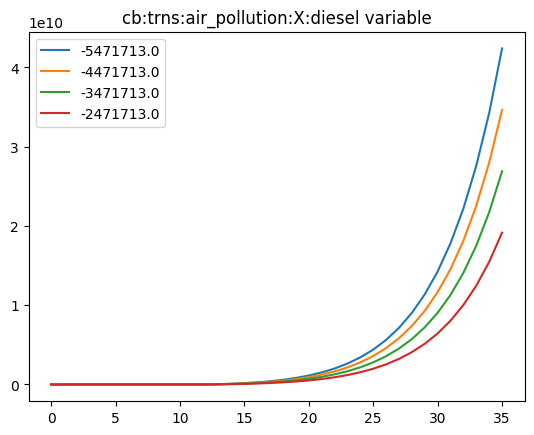

In [65]:
## We will update the multiplier from -6471713.0 to -5471713.0, -4471713.0, -3471713.0 and -2471713.0 and the annual_change from 1.0 to 1.2
import matplotlib.pyplot as plt

group_vars = ["strategy_code", "future_id", "region", "time_period", "variable"]

for parametro in [-5471713.0, -4471713.0, -3471713.0, -2471713.0]:
    cb_var_fields = {"multiplier" : parametro}
    cb_result = cb.cb_difference_between_two_strategies(cb_var_name = "cb:trns:air_pollution:X:diesel", 
                                        strategy_code_tx = "PFLO:NZ", 
                                        data_baseline = data_base, 
                                        data_tx = data_tx, 
                                        cb_var_fields = cb_var_fields)
    
    plt.plot(range(0,36), cb_result.groupby(group_vars).agg({"value" : "sum"}).reset_index().value, label = parametro)
plt.title("cb:trns:air_pollution:X:diesel variable")
plt.legend()


In [ ]:
## The method calculates all system costs for a specific strategy
cb.compute_system_cost_for_strategy(strategy_code_tx = 'PFLO:NZ')


In [ ]:
## The method calculates all technical costs for a specific strategy
cb.compute_technical_cost_for_strategy(strategy_code_tx = 'PFLO:NZ')


In [ ]:
## The compute_system_cost_for_all_strategies method compute all system cost for all strategies
results_system = cb.compute_system_cost_for_all_strategies()


In [ ]:
## The compute_technical_cost_for_all_strategies method compute all technical cost for all strategies
results_tx = cb.compute_technical_cost_for_all_strategies()


In [ ]:
# Combine results
results_all = pd.concat([results_system, results_tx], ignore_index = True)


In [ ]:

#-------------POST PROCESS SIMULATION RESULTS---------------
# Post process interactions among strategies that affect the same variables
results_all_pp = cb.cb_process_interactions(results_all)

# SHIFT any stray costs incurred from 2015 to 2025 to 2025 and 2035
results_all_pp_shifted = cb.cb_shift_costs(results_all_pp)

# Guardamos los resultados de CBA
OUTPUT_CB_PATH = "/home/milo/Documents/egtp/SISEPUEDE/CB/ejecuciones_cb_paquete/croatia_tornado/cb_salidas"
OUTPUT_CB_FILE_PATH = os.path.join(OUTPUT_CB_PATH, "cost_benefit_results_croatia_tornado.csv")

results_all_pp_shifted.to_csv(OUTPUT_CB_FILE_PATH, index = False)